In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# conda install -c districtdatalabs yellowbrick

In [3]:
import tensorflow as tf

In [4]:
#!pip install nltk
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')

# Read the CSV

In [5]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [7]:
del data['keywords']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [9]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [10]:
data= data.dropna(axis = 0, how ='any') 
data.sample(5)

,description,medical_specialty,sample_name,transcription
3287,"History of diabetes, osteoarthritis, atrial f...",General Medicine,H&P - Gen Med - 2,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
2592,Exam under anesthesia. Removal of intrauteri...,Obstetrics / Gynecology,Intrauterine Clots Removal,"PREOPERATIVE DIAGNOSIS: , Postpartum hemorrhag..."
1909,Template for History and Physical for a newborn.,Pediatrics - Neonatal,Normal Newborn H&P Template,"HISTORY OF PRESENT ILLNESS: , This is a ** wee..."
4934,Flexible Bronchoscopy (pediatric),Cardiovascular / Pulmonary,Bronchoscopy - Pediatric,"FLEXIBLE BRONCHOSCOPY,The flexible bronchoscop..."
3838,"Head injury, anxiety, and hypertensive emerge...",Emergency Room Reports,Head Injury,"CHIEF COMPLAINT:, Head injury.,HISTORY: , Thi..."


In [11]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [12]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
data.shape

(4966, 4)

In [14]:
#There are 2462670 words in the data set
data.index = range(4966)
data['transcription'].apply(lambda x: len(x.split(' '))).sum()

2462670

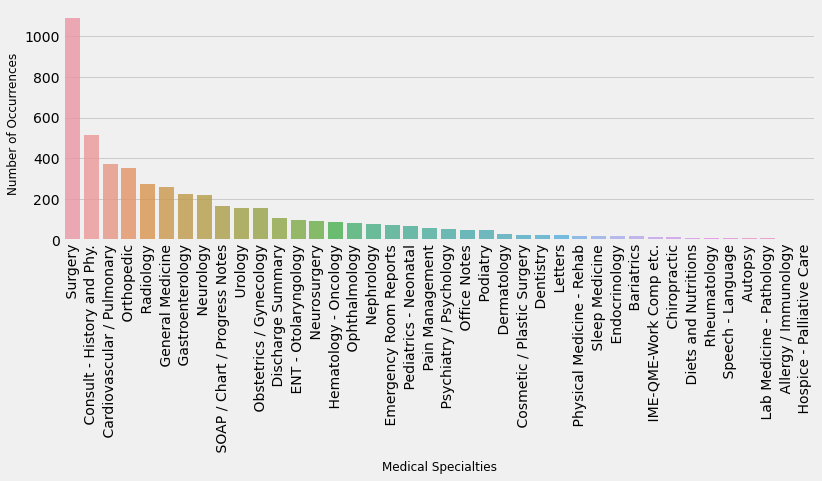

In [15]:
#The classes are imbalanced
import seaborn as sns
cnt_pro = data['medical_specialty'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Medical Specialties', fontsize=12)
plt.xticks(rotation=90)
plt.savefig("./plots/medical_specialty.png")

In [16]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4961    history:,  i had the pleasure of meeting and e...
4962    admitting diagnosis: , kawasaki disease.,disch...
4963    subjective: , this is a 42-year-old white fema...
4964    chief complaint: , this 5-year-old male presen...
4965    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [17]:
#Let’s have a look a few examples 
def clinical_note(index):
    example = data[data.index == index][['transcription', 'medical_specialty']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Medical Specialty:', example[1])
clinical_note(15)

history of present illness: ,i have seen abc today for her preoperative visit for weight management.  i have explained to her the need for optifast for weight loss prior to these procedures to make it safer because of the large size of her liver.  she understands this.,impression/plan:, we are going to put her on two weeks of optifast at around 900 calories.  i have also explained the risks and potential complications of laparoscopic cholecystectomy to her in detail including bleeding, infection, deep venous thrombosis, pulmonary embolism, injury to the small intestine, stomach, liver, leak from the cystic duct, common bile duct, and possible need for ercp and further surgery.  this surgery is going to be planned for october 6.  this is for cholelithiasis prior to her lap-banding procedure.,i have also reviewed with her the risks and potential complications of laparoscopic gastric banding including bleeding, infection, deep venous thrombosis, pulmonary embolism, slippage of the band, e

In [18]:
clinical_note(37)

preoperative diagnosis:,  benign prostatic hyperplasia.,postoperative diagnosis:,  benign prostatic hyperplasia.,operation performed: , transurethral electrosurgical resection of the prostate.,anesthesia: , general.,complications:,  none.,indications for the surgery:,  this is a 77-year-old man with severe benign prostatic hyperplasia.  he has had problem with urinary retention and bladder stones in the past.  he will need to have transurethral resection of prostate to alleviate the above-mentioned problems.  potential complications include, but are not limited to:,1.  infection.,2.  bleeding.,3.  incontinence.,4.  impotence.,5.  formation of urethral strictures.,procedure in detail: , the patient was identified, after which he was taken into the operating room.  general lma anesthesia was then administered.  the patient was given prophylactic antibiotic in the preoperative holding area.  the patient was then positioned, prepped and draped.  cystoscopy was then performed by using a #26

In [19]:
clinical_note(98)

preoperative diagnosis: , right inguinal hernia.,postoperative diagnosis: , direct right inguinal hernia.,title of procedure: , marlex repair of right inguinal hernia.,anesthesia:,  spinal.,procedure in detail:,  the patient was taken to the operative suite, placed on the table in the supine position, and given a spinal anesthetic.  the right inguinal region was shaved and prepped and draped in a routine sterile fashion.  the patient received 1 gm of ancef iv push.,transverse incision was made in the intraabdominal crease and carried through skin and subcutaneous tissue.  the external oblique fascia was exposed and incised down to and through the external inguinal ring.  the spermatic cord and hernia sac were dissected bluntly off the undersurface of the external oblique fascia exposing the attenuated floor of the inguinal canal.  the cord was surrounded with a penrose drain.  the hernia sac was separated from the cord structures.  the floor of the inguinal canal, which consisted of at

In [20]:
clinical_note(1007)

preoperative diagnosis: , right distal both-bone forearm fracture.,postoperative diagnosis: , right distal both-bone forearm fracture.,indications:,  mr. abc is a 10-year-old boy who suffered a fall resulting in a right distal both-bone forearm fracture.  upon evaluation by orthopedic surgery team in the emergency department, it was determined that a closed reduction under conscious sedation and application of a splint was warranted.  this was discussed with the parents who expressed verbal and written consent.,procedure:,  conscious sedation was achieved via propofol via the emergency department staff.  afterwards, traction with re-creation of the injury pattern was utilized to achieve reduction of the patient's fracture.  this was confirmed with image intensifier.  subsequently, the patient was placed into a splint.  the patient was aroused from conscious sedation and at this time it was noted that he had full sensation throughout radial, median, and ulnar nerve distributions and pos

In [21]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

,description,medical_specialty,sample_name,transcription
2846,Headache. Right frontal lobe glioma.,Neurology,Glioma - 2,"cc headache,hxy/o rhf presented to her local p..."
771,Cellulitis with associated abscess and foreig...,Surgery,Foreign Body Removal - Foot - 1,preoperative diagnoses cellulitis with associa...
3408,A 2-month-old female with 1-week history of c...,General Medicine,Congestion & Fever - 2-month-old,chief complaint a 2-month-old female with 1-w...
1628,Patient with a past medical history of a left...,Radiology,EMG/Nerve Conduction Study - 6,history the patient is a 46-year-old right-ha...
4905,Plastic piece foreign body in the right main...,Cardiovascular / Pulmonary,Bronchoscopy & Foreign Body Removal,preoperative diagnosis foreign body in airway....


In [22]:
#getting rid of targeted charachters in the trascription
chars = [",", ".", "[", "]", ' / ', ":", "``", ")", "(", "1", "2", "5", "%", "3", "4", "4-0", "3-0", "6", "''", "0", "2-0", "8", "7", "&", "5-0", "9", "0.5", "1.5", "500", "50", "100", "6-0", "15", "2.5", "14-15", "60", "'", "300", "14", "________", "7-0", "90", "__________", "3.5", "1:100,000", "70", "0.", "80", "1:50,000", "03/08/200 ", "03/09/2007", "25605", "7.314", "33.0", "855.", "08/22/03", "10/500", "125.", "144/6", '__', '___', '____', '_____', '______', '_______']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c," ")

data.sample(5)


,description,medical_specialty,sample_name,transcription
1966,Knee injection,Pain Management,Knee Injection,the patient was told that the injection may ca...
69,"The patient is a 16-month-old boy, who had a ...",Urology,Penile Cellulitis,chief complaint penile cellulitis status po...
748,"Removal of painful hardware, first left metat...",Surgery,Hardware Removal - Metatarsal,title of operation removal of painful hardware...
4514,"Left buttock abscess, status post incision an...",Consult - History and Phy.,Buttock Abscess,chief complaint buttock abscess history of pr...
1929,"1+ year, black female for initial evaluation ...",Pediatrics - Neonatal,Atopic Eczema,subjective this year black female new patie...


In [23]:
# Tokenizing 
from nltk.tokenize import word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents
1447,Followup of moderate-to-severe sleep apnea. ...,Sleep Medicine,Sleep Apnea,reason for visit mr abc is a -year-old man ...,"[reason, for, visit, mr, abc, is, a, -year-old..."
3996,"Removal of cystic lesion, removal of teeth, m...",Dentistry,Teeth Extraction,preoperative diagnoses basal cell nevus syndr...,"[preoperative, diagnoses, basal, cell, nevus, ..."
3610,Colonoscopy to screen for colon cancer,Gastroenterology,Colonoscopy - 6,indications this is a -year-old female who i...,"[indications, this, is, a, -year-old, female, ..."
497,Left facial cellulitis and possible odontogen...,Surgery,Odontogenic Abscess I&D,preoperative diagnoses left facial cellulitis ...,"[preoperative, diagnoses, left, facial, cellul..."
3545,The patient was brought to the OR with the kn...,Gastroenterology,Endovascular Abdominal Aortic Aneurysm Repair,preoperative diagnosis abdominal aortic aneury...,"[preoperative, diagnosis, abdominal, aortic, a..."


In [24]:
data["tokenized_sents"][0][0]

'subjective'

In [25]:
#Gettin the POS tags 
from nltk import pos_tag

In [26]:
nltk.tag.pos_tag(data["tokenized_sents"][0])

[('subjective', 'NN'),
 ('this', 'DT'),
 ('-year-old', 'JJ'),
 ('white', 'JJ'),
 ('female', 'NN'),
 ('presents', 'NNS'),
 ('with', 'IN'),
 ('complaint', 'NN'),
 ('of', 'IN'),
 ('allergies', 'NNS'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('allergies', 'NNS'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('lived', 'VBD'),
 ('in', 'IN'),
 ('seattle', 'NN'),
 ('but', 'CC'),
 ('she', 'PRP'),
 ('thinks', 'VBZ'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('worse', 'JJR'),
 ('here', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('past', 'JJ'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('tried', 'VBN'),
 ('claritin', 'NN'),
 ('and', 'CC'),
 ('zyrtec', 'NN'),
 ('both', 'DT'),
 ('worked', 'VBD'),
 ('for', 'IN'),
 ('short', 'JJ'),
 ('time', 'NN'),
 ('but', 'CC'),
 ('then', 'RB'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('lose', 'VB'),
 ('effectiveness', 'NN'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('used', 'VBN'),
 ('allegra', 'NN'),
 ('also', 'RB'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('that', 'IN'),
 (

In [27]:
data['POSTags'] = data['tokenized_sents'].apply(pos_tag)

In [28]:
data['POSTags'].head()

0    [(subjective, NN), (this, DT), (-year-old, JJ)...
1    [(past, JJ), (medical, JJ), (history, NN), (he...
2    [(history, NN), (of, IN), (present, JJ), (illn...
3    [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...
4    [(the, DT), (left, NN), (ventricular, JJ), (ca...
Name: POSTags, dtype: object

In [29]:
postags_plot =[data['POSTags'].to_list()]
type(postags_plot)

list

<AxesSubplot:title={'center':'PosTag plot for 2311510-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

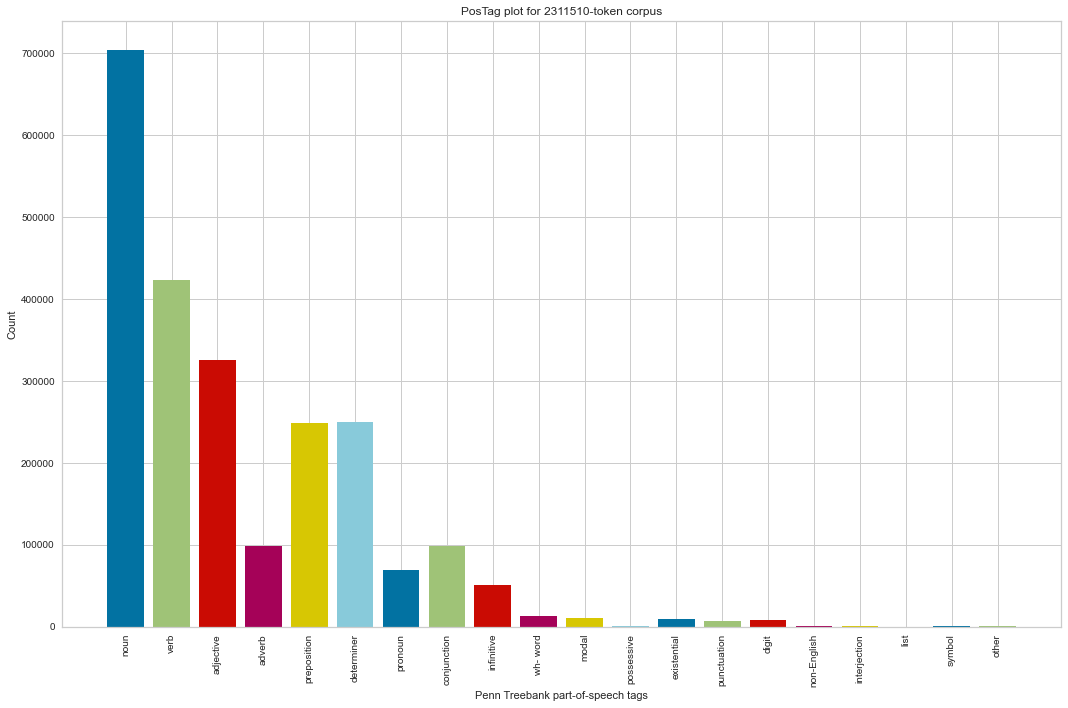

In [30]:
from yellowbrick.text import PosTagVisualizer

# # Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(size=(1080, 720))
viz.fit(postags_plot)
viz.show(outpath="plots/tokens_plot_total_corpus.png")

In [31]:
# Selecting the nouns in our corpus
data['Nouns'] = data['POSTags'].apply(lambda x: [(t[0], t[1]) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])

data['Nouns']

0       [(subjective, NN), (female, NN), (presents, NN...
1       [(history, NN), (difficulty, NN), (stairs, NNS...
2       [(history, NN), (illness, NN), (i, NN), (abc, ...
3       [(m-mode, NN), (enlargement, NN), (diameter, N...
4       [(left, NN), (cavity, NN), (size, NN), (wall, ...
                              ...                        
4961    [(history, NN), (i, NN), (pleasure, NN), (meet...
4962    [(diagnosis, NN), (kawasaki, NN), (disease, NN...
4963    [(subjective, NN), (female, NN), (today, NN), ...
4964    [(complaint, NN), (male, NN), (presents, NNS),...
4965    [(history, NN), (male, NN), (presents, NNS), (...
Name: Nouns, Length: 4966, dtype: object

In [32]:
#get the nouns in the tuples
to_be_lemmatized = []

for nouns_per_medical_specialties in data['Nouns']:
    
    
    words2lemmatied = []
    for word in nouns_per_medical_specialties:
        words2lemmatied.append(word[0])
    
    to_be_lemmatized.append(words2lemmatied)


data['to_be_lemmatized'] = to_be_lemmatized
data['to_be_lemmatized']

0       [subjective, female, presents, complaint, alle...
1       [history, difficulty, stairs, difficulty, airl...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4961    [history, i, pleasure, meeting, patient, today...
4962    [diagnosis, kawasaki, disease, discharge, diag...
4963    [subjective, female, today, physical, asthma, ...
4964    [complaint, male, presents, children, hospital...
4965    [history, male, presents, today, recommendatio...
Name: to_be_lemmatized, Length: 4966, dtype: object

In [33]:
#lemmatizing
from nltk.stem import WordNetLemmatizer

lmtzr = WordNetLemmatizer()


data['lemmatize'] = data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
print(data['lemmatize'])

# data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])



0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4961    [history, i, pleasure, meeting, patient, today...
4962    [diagnosis, kawasaki, disease, discharge, diag...
4963    [subjective, female, today, physical, asthma, ...
4964    [complaint, male, present, child, hospital, em...
4965    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [34]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize
2966,The patient is admitted with a diagnosis of a...,Nephrology,Nephrology Consultation - 4,history the patient is a -year-old male pati...,"[history, the, patient, is, a, -year-old, male...","[(history, NN), (the, DT), (patient, NN), (is,...","[(history, NN), (patient, NN), (patient, NN), ...","[history, patient, patient, i, patient, blood,...","[history, patient, patient, i, patient, blood,..."
3162,Excisional biopsy of right cervical lymph node.,Hematology - Oncology,Biopsy - Cervical Lymph Node,preoperative diagnosis cervical lymphadenopath...,"[preoperative, diagnosis, cervical, lymphadeno...","[(preoperative, JJ), (diagnosis, NN), (cervica...","[(diagnosis, NN), (diagnosis, NN), (procedure,...","[diagnosis, diagnosis, procedure, biopsy, lymp...","[diagnosis, diagnosis, procedure, biopsy, lymp..."
2539,Bilateral breast MRI with & without IV contrast.,Obstetrics / Gynecology,MRI Breast - 1,findingsthere are post biopsy changes seen in ...,"[findingsthere, are, post, biopsy, changes, se...","[(findingsthere, RB), (are, VBP), (post, JJ), ...","[(biopsy, NN), (changes, NNS), (region, NN), (...","[biopsy, changes, region, aspect, left, breast...","[biopsy, change, region, aspect, left, breast,..."
648,Microscopic-assisted revision of bilateral de...,Surgery,Laminectomy & Foraminotomy Revision,preoperative diagnoses recurrent spinal stenos...,"[preoperative, diagnoses, recurrent, spinal, s...","[(preoperative, JJ), (diagnoses, NNS), (recurr...","[(diagnoses, NNS), (stenosis, NN), (l, NN), (-...","[diagnoses, stenosis, l, -ll, -land, l, -s, sp...","[diagnosis, stenosis, l, -ll, -land, l, -s, sp..."
4831,Abnormal EKG and rapid heart rate. The patie...,Cardiovascular / Pulmonary,Consult - Abnormal EKG,reason for consultation abnormal ekg and rapid...,"[reason, for, consultation, abnormal, ekg, and...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (ekg, NN), ...","[reason, consultation, ekg, heart, rate, histo...","[reason, consultation, ekg, heart, rate, histo..."


In [35]:
print(data['lemmatize'])

0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4961    [history, i, pleasure, meeting, patient, today...
4962    [diagnosis, kawasaki, disease, discharge, diag...
4963    [subjective, female, today, physical, asthma, ...
4964    [complaint, male, present, child, hospital, em...
4965    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [36]:
type(data['lemmatize'])

pandas.core.series.Series

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4966 non-null   object
 1   medical_specialty  4966 non-null   object
 2   sample_name        4966 non-null   object
 3   transcription      4966 non-null   object
 4   tokenized_sents    4966 non-null   object
 5   POSTags            4966 non-null   object
 6   Nouns              4966 non-null   object
 7   to_be_lemmatized   4966 non-null   object
 8   lemmatize          4966 non-null   object
dtypes: object(9)
memory usage: 349.3+ KB


In [38]:
len(data['lemmatize'][1])


129

In [39]:
data['lemmatize_count'] = data['lemmatize'].astype('str')
data['lemmatize_count']=data['lemmatize_count'].str.split().str.len()

In [40]:
data.sample(5)

,description,medical_specialty,sample_name,transcription,tokenized_sents,POSTags,Nouns,to_be_lemmatized,lemmatize,lemmatize_count
2499,Ultrasound OB - followup for fetal growth.,Obstetrics / Gynecology,Ultrasound OB,reason for exam followup for fetal growth ...,"[reason, for, exam, followup, for, fetal, grow...","[(reason, NN), (for, IN), (exam, NN), (followu...","[(reason, NN), (exam, NN), (followup, NN), (gr...","[reason, exam, followup, growth, interpretatio...","[reason, exam, followup, growth, interpretatio...",70
3338,Patient in with mom for possible ear infection.,General Medicine,Gen Med Consult - 23,subjective mom brings the patient in today fo...,"[subjective, mom, brings, the, patient, in, to...","[(subjective, JJ), (mom, NN), (brings, VBZ), (...","[(mom, NN), (patient, NN), (today, NN), (infec...","[mom, patient, today, infection, ear, pain, to...","[mom, patient, today, infection, ear, pain, to...",81
3628,"Colonoscopy due to rectal bleeding, constipat...",Gastroenterology,Colonoscopy - 1,indication rectal bleeding constipation abn...,"[indication, rectal, bleeding, constipation, a...","[(indication, NN), (rectal, NN), (bleeding, VB...","[(indication, NN), (rectal, NN), (constipation...","[indication, rectal, constipation, ct, rule, i...","[indication, rectal, constipation, ct, rule, i...",12
30,The patient noted for improving retention of ...,Urology,Urinary Retention - Followup,history of present illness the patient present...,"[history, of, present, illness, the, patient, ...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (patient, NN), ...","[history, illness, patient, presents, today, f...","[history, illness, patient, present, today, fo...",57
3555,EGD with dilation for dysphagia.,Gastroenterology,EGD with Dilation,indication,[indication],"[(indication, NN)]","[(indication, NN)]",[indication],[indication],1


In [41]:
del data['to_be_lemmatized']
del data['sample_name']

In [42]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
236,Insertion of transesophageal echocardiography...,Surgery,indications for procedure impending open hear...,"[indications, for, procedure, impending, open,...","[(indications, NNS), (for, IN), (procedure, NN...","[(indications, NNS), (procedure, NN), (heart, ...","[indication, procedure, heart, surgery, closur...",97
3570,Patient with a history of a Nissen fundoplica...,Gastroenterology,admitting diagnoses hiatal hernia gastroesop...,"[admitting, diagnoses, hiatal, hernia, gastroe...","[(admitting, VBG), (diagnoses, NNS), (hiatal, ...","[(diagnoses, NNS), (hernia, NN), (gastroesopha...","[diagnosis, hernia, gastroesophageal, reflux, ...",140
541,Right nodular malignant mesothelioma.,Surgery,preoperative diagnosis right mesothelioma po...,"[preoperative, diagnosis, right, mesothelioma,...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (diagnosis, NN), (lung, NN),...","[diagnosis, diagnosis, lung, mass, diaphragm, ...",252
2985,Acute on chronic renal failure and uremia. I...,Nephrology,preoperative diagnoses acute on chronic renal ...,"[preoperative, diagnoses, acute, on, chronic, ...","[(preoperative, JJ), (diagnoses, NNS), (acute,...","[(diagnoses, NNS), (failure, NN), (diagnoses, ...","[diagnosis, failure, diagnosis, failure, proce...",91
723,Construction of right upper arm hemodialysis ...,Surgery,preoperative diagnosis end-stage renal disease...,"[preoperative, diagnosis, end-stage, renal, di...","[(preoperative, JJ), (diagnosis, NN), (end-sta...","[(diagnosis, NN), (disease, NN), (dialysis, NN...","[diagnosis, disease, dialysis, fistula, diagno...",113


In [43]:
data.reset_index(drop=True)


,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"[subjective, this, -year-old, white, female, p...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"[-d, m-mode, left, atrial, enlargement, with, ...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"[the, left, ventricular, cavity, size, and, wa...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65
...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"[history, i, had, the, pleasure, of, meeting, ...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"[admitting, diagnosis, kawasaki, disease, disc...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"[subjective, this, is, a, -year-old, white, fe...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"[chief, complaint, this, -year-old, male, pres...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136


In [44]:
from collections import Counter
dictionary= data['lemmatize'].transform(lambda x: Counter(x)).sum()
dictionary

for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])

patient 23378
history 9438
procedure 7791
pain 5444
time 4927
/ 4844
i 4675
diagnosis 4522
incision 3905
blood 3803
room 3497
s 3329
day 3325
artery 3162
area 3091
skin 2939
medication 2765
mg 2757
suture 2744
extremity 2718
disease 2631
position 2630
tissue 2536
left 2490
pressure 2479
fashion 2441
x 2404
anesthesia 2311
surgery 2151
heart 2124
mass 2120
condition 2083
evidence 2075
examination 2057
operating 2055
abdomen 2022
muscle 1992
neck 1990
week 1987
lesion 1978
side 1973
catheter 1966
year 1926
complication 1889
level 1874
sign 1857
vicryl 1824
wound 1796
loss 1791
family 1759
risk 1746
care 1739
nerve 1733
symptom 1706
rate 1660
p 1652
head 1628
finding 1628
system 1607
eye 1597
change 1583
foot 1576
bone 1572
right 1548
dissection 1505
tube 1485
dr 1473
point 1461
plan 1459
problem 1458
difficulty 1448
bladder 1436
none 1403
lung 1397
treatment 1382
status 1376
cm 1364
today 1358
exam 1357
female 1351
chest 1340
hospital 1332
site 1328
bowel 1321
knee 1300
evaluation 1296
v

occlusion 152
band 152
ounce 152
versus 152
cystoscopy 151
gram 151
etiology 151
output 151
interval 151
perfusion 151
signal 151
hepatitis 150
step 150
tooth 150
cholecystectomy 150
chloride 150
birth 149
inr 149
urinalysis 149
tremor 149
percussion 149
thing 148
rule 148
auscultation 148
hyperlipidemia 148
testing 148
name 147
station 147
collateral 147
observation 147
dizziness 147
tachycardia 147
prophylaxis 146
med 146
monitor 146
esmarch 146
entry 146
dementia 146
enlargement 145
pad 145
december 145
duodenum 144
naris 144
mixture 144
flexor 144
lymphadenopathy 143
mattress 143
transfer 143
score 143
dysuria 142
iron 142
velocity 142
adenopathy 141
dysphagia 141
ulceration 141
emg 141
surgeon 140
implantation 140
periosteum 140
interpretation 140
effort 140
tylenol 139
transplant 139
mucosal 139
qd 139
sample 138
loop 138
sweat 138
endoscope 138
osteoarthritis 137
roll 137
drape 137
’ 137
hemorrhoid 136
index 136
preparation 136
relief 136
extraction 136
rupture 136
immunization 

running 63
cat 63
phosphatase 63
flush 63
diamond 63
chance 63
pda 63
ecchymosis 63
reading 63
recall 63
heartburn 62
prolapse 62
cephalad 62
babinski 62
dosage 62
colace 62
deltoid 62
generator 62
apgars 62
pulley 62
osteotome 62
multiple 62
disturbance 62
paralysis 62
ductus 62
waist 62
oil 62
brevis 62
penetration 62
-cand 62
session 62
magnesium 62
postprocedure 61
blake 61
connection 61
dorsum 61
serum 61
chief 61
albumin 61
firm 61
adnexa 61
autograft 61
mediastinum 61
tuberosity 61
house 61
adenoma 61
egd 61
infiltrate 61
inhibitor 61
mesothelioma 61
milk 61
comprehension 61
gain 60
load 60
etc 60
crest 60
vertigo 60
palsy 60
levaquin 60
vancomycin 60
k 60
cauterization 60
articulation 60
lift 60
tonsillectomy 60
steel 60
wrap 60
scoliosis 60
displacement 60
excursion 60
pedis 60
pullback 60
lv 60
tolerance 60
tibialis 60
bue 60
cirrhosis 59
scarpa 59
contracture 59
functioning 59
chemistry 59
hydrocephalus 59
cath 59
myringotomy 59
adenoid 59
eminence 59
cart 59
cocaine 59
whee

dental 35
/with 35
dexamethasone 35
nurolon 35
stenting 35
tuesday 35
leukemia 35
trapezius 35
vaccine 35
bending 35
refer 35
inversion 35
c-spine 35
cv 35
lfts 35
ambulance 35
od 35
cardiomegaly 35
epilepsy 35
environment 35
atherosclerosis 35
ana 35
travel 35
route 34
silicone 34
hasson 34
clindamycin 34
hypospadias 34
daily 34
stalk 34
valsalva 34
absent 34
force 34
board 34
hospice 34
uncle 34
hydrodissection 34
manipulator 34
expectation 34
adduction 34
protamine 34
grafting 34
midas 34
division 34
feature 34
avulsion 34
tearing 34
posture 34
sport 34
cad 34
polypectomy 34
cmp 34
synthroid 34
gastroenterologist 34
suicide 34
schizophrenia 34
hypoglycemia 34
dph 34
meningioma 34
snoring 33
gout 33
latissimus 33
vasculature 33
darvocet 33
chain 33
otherwise 33
compliance 33
tilt 33
choice 33
suspicion 33
leaf 33
serology 33
box 33
carpus 33
adenoidectomy 33
ox 33
maximum 33
acl 33
varus 33
tuberculosis 33
therefore 33
vestibule 33
piriform 33
regular 33
celebrex 33
sphenoid 33
calca

t-tube 22
gluteal 22
difficile 22
defibrillation 22
motility 22
discoloration 22
klonopin 22
evaluate 22
ferritin 22
phosphorus 22
centrum 22
paxil 22
electroencephalogram 22
ft 22
tendinitis 22
m/second 22
depakote 22
neighbor 22
fluconazole 22
passenger 22
spasticity 22
harvest 21
inflow 21
ringer 21
demonstration 21
benzoin 21
horizontal 21
extravasation 21
soreness 21
funduscopic 21
institution 21
midportion 21
thursday 21
reflection 21
subcuticular 21
zosyn 21
toldt 21
making 21
prepped 21
coagulopathy 21
spacers 21
constriction 21
row 21
polydipsia 21
tonight 21
try 21
tibial 21
intact 21
bipolar 21
eardrum 21
construct 21
arteritis 21
cicatrix 21
craniectomy 21
porus 21
ethanol 21
conchal 21
bowl 21
rhinoplasty 21
cannulation 21
preservation 21
phenol 21
radialis 21
deterioration 21
rightward 21
-land 21
facetectomy 21
nonunion 21
furthermore 21
court 21
swallowing 21
tb 21
tracing 21
colectomy 21
calvarium 21
tattoo 21
item 21
tinel 21
teacher 21
hyperactivity 21
examvitals 21


flattening 15
exiting 15
collision 15
ophthalmologist 15
f-waves 15
hctz 15
shop 15
pneumatosis 15
employer 15
amphetamine 15
-minute 15
admit 15
pertussis 15
heartbeat 15
ranitidine 15
normalization 15
chicken 14
pseudotumor 14
neuro 14
psychologist 14
diagnostics 14
anticipation 14
address 14
nephrolithiasis 14
detorsion 14
crisis 14
ileal 14
scrotal 14
rapide 14
hematologic 14
oozing 14
pacer 14
/was 14
indentation 14
staphylococcus 14
inguinal 14
relocation 14
indigestion 14
inside 14
hive 14
mesentry 14
holiday 14
preoperative 14
reapproximation 14
deflation 14
caprosyn 14
pectoris 14
sensing 14
collagen 14
clotting 14
band-aid 14
hsv 14
hence 14
westcott 14
cholesteatoma 14
brachial 14
kit 14
pcl 14
biomet 14
reaming 14
anteversion 14
tensor 14
annulotomy 14
bulldog 14
neoplasia 14
salpingo-oophorectomy 14
file 14
arachnoid 14
selection 14
overlying 14
polypoid 14
flushing 14
eyebrow 14
circulatory 14
decannulation 14
salpingectomy 14
knuckle 14
arthroscope 14
folliculitis 14
sed

paresis 10
partial-occlusion 10
capstone 10
controller 10
fogarty 10
thoracostomy 10
brisk 10
gear 10
dyspareunia 10
endogia 10
bmw 10
bishop 10
showing 10
mersilene 10
eps 10
nasopharyngoscopy 10
periorbita 10
progav 10
coracoid 10
bend 10
septorhinoplasty 10
culprit 10
magnitude 10
re-operation 10
concha 10
fibrin 10
fertility 10
thermocoagulation 10
ssand 10
radiometer 10
hemoximeter 10
translator 10
corpectomy 10
excellent 10
hydrodelineation 10
chop 10
cystitome 10
divide-and-conquer 10
restylane 10
tortuosity 10
washer 10
intercuspation 10
viii 10
quad 10
cpm 10
mastopexy 10
stapling 10
rejection 10
proper 10
hilar 10
microcalcifications 10
compress 10
capitis 10
probing 10
bowman 10
santa 10
grommet 10
apron 10
johnson 10
photodocumentation 10
serratus 10
hemithorax 10
hemolysis 10
macrosomia 10
iupc 10
serosal 10
estrogen 10
ductotomy 10
kyphoplasty 10
tamp 10
hemashield 10
bifida 10
cor 10
hemicraniectomy 10
pvc 10
lao 10
xience 10
gastroscopy 10
pulp 10
itching 10
engorgement

xerostomia 8
schatzker 8
onychomycosis 8
journal 8
cetaphil 8
carvedilol 8
elevates 8
neovascularization 8
abilify 8
widow 8
-channel 8
asleep 8
disorientation 8
visceromegaly 8
exhibit 8
ptca 8
pneumothoraces 8
t-spine 8
/csf 8
elisa 8
pp/lt/vib 8
lft 8
acromiale 8
l-spine 8
mestinon 8
dysesthesia 8
childbirth 8
rmca 8
posturing 8
diazepam 8
sem 8
hyperintense 8
print 8
yr 8
praxis 8
/which 8
ventriculomegaly 8
reinnervation 8
immobilization 8
birads 8
church 8
authorization 8
world 8
multilevel 8
stranding 8
unsteadiness 8
lawn 8
humulin 8
choreiform 8
g/dl 8
/hct 8
simulator 8
property 8
ecotrin 8
ad 8
spouse/partner 8
restless 8
bill 8
oxide 8
sobriety 8
seclusion 8
spelling 8
terrace 8
tyler 8
sleeping 8
last 8
discord 8
leave 8
math 8
club 8
vytorin 8
hemotympanum 8
mag 8
industry 8
corporation 8
tactile 8
tpa 8
oppositionality 8
appear 8
ag 8
analog 8
aide 8
uri 8
hypoparathyroidism 8
moro 8
psh 8
gingival 8
ovale 8
neosure 8
diazoxide 8
ill 8
celsius 8
neutropenia 8
breast-feed

fibroadenoma 6
bossings 6
db 6
screener 6
dermatochalasis 6
blepharon 6
coverlet 6
baker 6
thromboembolism 6
hodgkin 6
arteriosclerosis 6
tetralogy 6
fallot 6
hemarthrosis 6
mitek 6
cloth 6
putty 6
uniplate 6
chronos 6
cornerstone 6
-cgreater 6
discectomies 6
-cwith 6
omohyoid 6
interference 6
zephyr 6
structural 6
platysmus 6
mystique 6
overgrowth 6
cloward 6
peritenon 6
domain 6
spent 6
xy 6
subtest 6
abdominus 6
maze 6
protuberant 6
wasp 6
tossing 6
disarray 6
arise 6
actonel 6
pseudoaneurysm 6
reticulocyte 6
sock 6
pex 6
prison 6
dp 6
clue 6
contin 6
hypoventilation 6
mantle 6
omnicef 6
vasotec 6
radiates 6
wichita 6
discus 6
requip 6
hypertriglyceridemia 6
metronidazole 6
erythematosus 6
atarax 6
obstipation 6
heaviness 6
b/p 6
carrot 6
vomit 6
celery 6
pedialyte 6
papule 6
myofascitis 6
watcher 6
crepitance 6
emphasis 6
exercising 6
prepregnancy 6
sunburn 6
soapy 6
bactroban 6
watch 6
stable 6
francisco 6
departure 6
podiatrist 6
tmj 6
tenormin 6
birthday 6
scleritis 6
wean 6
mou

debility 4
cottonwood 4
tightening 4
sub 4
cover 4
microhematuria 4
nonobstructing 4
prefers 4
catheterizing 4
supra-dartos 4
grenade 4
viability 4
perfix 4
disfigurement 4
spongiosum 4
buck 4
neomeatus 4
byers 4
hydrocelectomy 4
cbi 4
impediment 4
pipeline 4
hpv 4
escherichia 4
electrofulguration 4
bugbee 4
lasting 4
diagnoseshematuria 4
softening 4
cystoscopies 4
offset 4
cystolithotripsy 4
cystoprostatectomy 4
hdr 4
gynecomastia 4
impotency 4
mogen 4
stay-stitch 4
elastoplast 4
xhours 4
cavernosum 4
gamco 4
grid 4
avodart 4
hematologic/lymphatic 4
somewhat 4
rigidus 4
aldosterone 4
indicator 4
iopidine 4
bioarc 4
xenograft 4
superonasal 4
cme 4
tpedicle 4
vvir 4
pipe 4
ophthalmoscope 4
skirt 4
akinesia 4
neuropen 4
macrocephaly 4
rumi 4
portio 4
ldr 4
-week 4
antebrachial 4
flexor-pronator 4
penny 4
hypotony 4
his/her 4
tg 4
myringosclerosis 4
titanium-porp 4
merocel 4
elli 4
triggering 4
claw 4
freeing 4
-in- 4
bv 4
centering 4
trochlea 4
mcgill 4
cementation 4
xabds 4
cobalt 4
cob

lifestyle 4
self-esteem 4
depersonalization 4
circumstantiality 4
abstraction 4
assessmentaxis 4
cannabis 4
rum 4
professional 4
shelter 4
tds 4
invega 4
luke 4
glimepiride 4
interviewer 4
mmm 4
silverberg 4
recovers 4
money 4
redirection 4
caretaker 4
ptsd 4
catatonia 4
simethicone 4
master 4
hypersomnia 4
enterobacter 4
chondroitin 4
sensorium 4
argument 4
administrator 4
sexuality 4
janet 4
sandal 4
thereafter 4
dependance 4
tremulousness 4
hazard 4
dangerousness 4
ciwa 4
correspondence 4
chef 4
pseudoseizures 4
niece 4
fun 4
iq 4
explore 4
dsm 4
gene 4
psychopathology 4
fussy 4
weightlifting 4
oven 4
message 4
trait 4
cft 4
reward 4
homework 4
pvd 4
polo 4
damp 4
leisure 4
/points 4
rep 4
tailbone 4
adl 4
footing 4
grocery 4
laborer 4
broker 4
hib 4
fingerstick 4
molluscum 4
severe 4
endocrinopathy 4
tijuana 4
junior 4
thyroxine 4
typical 4
provoking 4
mylicon 4
mizel 4
grass 4
volleyball 4
clarinet 4
elocon 4
smile 4
otoscopic 4
milliliter 4
ballard 4
vernix 4
lib 4
clunk 4
bm 4
u

skribe 3
microanalysis 3
gentamycin 3
search 3
-speek 3
-lwe 3
dowel 3
-sbmp 3
-sless 3
hoarse 3
-cthe 3
setscrew 3
postioning 3
subdermal 3
orthosis 3
attendant 3
nonfusion 3
nonimprovement 3
acufix 3
distractor 3
succession 3
atlantis 3
fibrosus 3
surgifoam 3
checked 3
re-revision 3
shaping 3
juxtaposition 3
esophageus 3
sternohyoid/omohyoid 3
inline 3
acf 3
perfect 3
self-tapping 3
esis 3
cpart 3
blackstone 3
shoot 3
mouse 3
sunk 3
castoff 3
referable 3
steffee 3
platysmata 3
ctwo 3
dust 3
anytime 3
passy-muir 3
therapythe 3
linguistic 3
pyriform 3
bisphosphonate 3
nod 3
irbesartan 3
proficiency 3
psychophysiologic 3
ritual 3
bunch 3
narcan 3
hnasal 3
weekday 3
barney 3
downtown 3
stamen 3
facies 3
spironolactone 3
multifidus 3
multifidus/trapezius 3
hotchkinson 3
abgs 3
w/ 3
polyarteritis 3
nodosa 3
toss 3
hwith 3
cmhand 3
biot 3
asv 3
k-tab 3
stereognosis 3
aerobics 3
awas 3
relaxer 3
dissatisfaction 3
healthier 3
high-protein 3
craze 3
pasta 3
pet/ct 3
pudding 3
wal-mart 3
overea

midepigastrium 2
ejaculatory 2
stomag 2
proximally 2
orchidopexy 2
multilength 2
nephrostogram 2
bowel/rectum/bladder/ureters 2
osteitis 2
array 2
counterclockwise 2
cooper 2
posteriormost 2
proven 2
rectourethralis 2
professor 2
systemseyes 2
dt 2
tandoc 2
prostascint 2
trus 2
cloquet 2
racquet 2
hemorrhoidal 2
karnofsky 2
audit 2
skeletal 2
pathologyprostate 2
mid-region 2
bullet 2
am 2
confident 2
corporotomies 2
rope 2
mcdevitt 2
stomel 2
arthritides 2
incontinency 2
procedurescystoscopy 2
microacinar 2
pale-looking 2
detainee 2
gush 2
descriptionspecimen 2
obturation 2
descriptionsection 2
summarya 2
puberty 2
performed 2
rare 2
tubes/drains 2
cleanse 2
cryoclamp 2
looping 2
shelving 2
collodion 2
nonpalpable 2
crile 2
empty 2
bellow 2
cavermap 2
constricture 2
etcetera 2
hemoclipped 2
epidermidis 2
behind 2
ensuring 2
posterolateral 2
gubernaculum 2
calibrating 2
poupart 2
iliopubic 2
bassini 2
tevdek 2
anti-cholinergic 2
monocril 2
thinness 2
penectomy 2
fungating 2
splaying 2
t

cross-over 2
morcellation 2
single-lumen 2
briskly 2
operculum 2
meddle 2
absorbables 2
popoffs 2
intracartilage 2
found 2
terrano 2
facing 2
diastole 2
videotape 2
gia-was 2
excentric 2
xb 2
re-canalization 2
trifurcates 2
malignant 2
timi 2
scintigraphy 2
y-graft 2
reopro/stent 2
bya 2
hypercontractility 2
xvision 2
extrinsic 2
femostop 2
hang 2
atn 2
mynx 2
minute/m 2
timi-i 2
zeta 2
arose 2
t-type 2
semimembranosus 2
jl-jr-and 2
arteriesleft 2
lmca 2
flail 2
columnar 2
scrape 2
racket 2
striking 2
angiocatheter 2
radiography 2
bonding 2
viscostat 2
pulpotomies 2
frontotemporoparietal 2
icp 2
sub-carina 2
teapot 2
passive 2
retriever 2
secure 2
laryngoscopy/microscopic 2
isolation 2
subsegement 2
subsegment 2
procedurethis 2
sevoflurane 2
arytenoid 2
bacterial 2
bronchomalacia 2
fibromucosa 2
prebronchoscopy 2
bedsite 2
detailsthe 2
semi-fowler 2
oro 2
micro-laryngoscopy 2
thyroplasty 2
strainer 2
physiosol 2
bd 2
thence 2
stasney 2
wholey 2
royal 2
oms 2
bacteriologic 2
midtrachea 

implication 2
pulmonale 2
highlight 2
plms 2
compumedics 2
polysomnograph 2
-ac 2
-ao 2
-a 2
-aeog 2
electrocardiography 2
prm 2
recommendationsaxis 2
polysomnography 2
ahi 2
oral/nasal 2
intermixed 2
awake/alert/drowsy 2
-cycle/second 2
cycle/second 2
petit 2
-hz 2
theta 2
lighter 2
bald 2
gaining 2
acanthosis 2
impressionthe 2
recommendationsi 2
ci 2
fl/bpd 2
fl/hc 2
fl/ac 2
hc/ac 2
yolk 2
beta-hcg 2
evaluationtwin 2
findingsby 2
technologist 2
abscess/neoplasm 2
body/limb 2
databpd 2
arteries/branches 2
bpd 2
negativity 2
multi-plane 2
reader 2
rvsp 2
cm/sec 2
vertebrals 2
multiplane 2
benzocaine 2
bileaflet 2
equation 2
echodensity 2
vand 2
millicurie 2
hitch 2
falls/fights 2
groggy 2
sah/contusion 2
librium 2
copying 2
malrotation 2
hyzaar 2
repolorization 2
sulfur 2
colloid 2
triphosphate 2
mcg/kg/min 2
vicinity 2
fdg 2
fibrocartilage 2
variance 2
ecu 2
hidden 2
” 2
labra 2
impressioninflammation 2
osteoarthropathy 2
impinging 2
impressionthere 2
diastasis 2
gm/kg 2
helicopter 2


cephalhematoma 2
abreast 2
incompatibility 2
galactosemia 2
s/ 2
inconsolability 2
cutis 2
marmorata 2
vasodilatation 2
micrognathia 2
aquaphor 2
corrales 2
externa 2
eardrop 2
isovue-m 2
intravascular 2
apprehension 2
avinza 2
chickenpox 2
soluspan 2
icing 2
decalcification 2
bulging/herniation 2
historyend 2
epogen 2
historytonsillectomy 2
qm 2
acupuncture 2
display 2
convenient 2
ultracet 2
desmopressin 2
aspirin/oxycodone 2
come 2
inquiry 2
yours 2
nj 2
ester-c 2
primrose 2
quercetin 2
patrick/faber 2
unload 2
self-refer 2
soft-tissue 2
voltaren 2
cod 2
sure 2
antalgic 2
-lhe 2
grader 2
ceftin 2
au 2
lait 2
polymyalgia 2
rheumatica 2
evokes 2
niacin 2
diprosone 2
fax 2
addendum 2
woodwork 2
squeeze 2
sprinkler 2
gig 2
tacoma 2
whiplash 2
bremerton 2
-cbut 2
usetobacco 2
lou 2
gehrig 2
historymarital 2
visibly 2
rotates 2
palpating 2
jamar 2
wac 2
award 2
scratchy 2
ir 2
spasm/calf 2
pt/ot 2
cascade 2
plus 2
flexion/extension 2
evaluation/treatment 2
op 2
convalescence 2
iredell 2
p

nonprogression 2
r-wave 2
plethora 2
holden 2
piperacillin/tazobactam 2
scenario 2
whereby 2
parcel 2
notion 2
nondihydropyridine 2
halifax 2
i/vi 2
live 2
craig 2
simmons 2
nutritional 2
gravel 2
sudafed 2
data/lab 2
stratification 2
thromboprophylaxis 2
holt 2
anyway 2
cafeteria 2
lovaza 2
offending 2
angioedema 2
heent/neck 2
motionflexion 2
mvv 2
rv/tlc 2
couplet 2
trigemini 2
doesn 2
residence 2
earring 2
piercings 2
serosa 2
antemortem 2
defense 2
metallic 2
gray-pink 2
sensitivitygram 2
antigenshemophilus 2
pneumoniae 2
meningitidis 2
neiserria 2
o+ 2
stria 2
leiomyoma 2
sleeveless 2
turtleneck 2
sweatpants 2
hoop 2
hemorrhaging 2
blonde 2
strangulation 2
abrasion/contusion 2
one-eight 2
purple 2
one-sixteenth 2
illnessi 1
slippage 1
bariatrics 1
vincent 1
surgisis 1
vesseloops 1
comedo 1
surrounding 1
foul-smelling 1
transperineal 1
chattanooga 1
episioproctotomy 1
commencement 1
locationing 1
aspirant 1
diagnosisleft 1
mammosite 1
performedexcision 1
jackknife 1
hexedine 1
pps

In [45]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
# data.sample(5)

In [46]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

0       ['subjective', 'this', '-year-old', 'white', '...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['-d', 'm-mode', 'left', 'atrial', 'enlargemen...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4961    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4962    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4963    ['subjective', 'this', 'is', 'a', '-year-old',...
4964    ['chief', 'complaint', 'this', '-year-old', 'm...
4965    ['history', 'a', '-year-old', 'male', 'present...
Name: tokenized_sents, Length: 4966, dtype: object

In [47]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
3966,"Skin biopsy, scalp mole. Darkened mole statu...",Dermatology,procedure skin biopsy scalp mole indication ...,"['procedure', 'skin', 'biopsy', 'scalp', 'mole...","[(procedure, NN), (skin, NN), (biopsy, NN), (s...","[(procedure, NN), (skin, NN), (biopsy, NN), (i...","[procedure, skin, biopsy, indication, female, ...",43,103
2090,"Open reduction and internal fixation, high gr...",Orthopedic,preoperative diagnosis severely comminuted fra...,"['preoperative', 'diagnosis', 'severely', 'com...","[(preoperative, JJ), (diagnosis, NN), (severel...","[(diagnosis, NN), (fracture, NN), (radius, NN)...","[diagnosis, fracture, radius, diagnosis, fract...",199,734
1222,Anterior cervical discectomy and osteophytect...,Surgery,preoperative diagnoses cervical radiculopathy...,"['preoperative', 'diagnoses', 'cervical', 'rad...","[(preoperative, JJ), (diagnoses, NNS), (cervic...","[(diagnoses, NNS), (c, NN), (-c, NN), (-c, NNP...","[diagnosis, c, -c, -c, spondylosis, c, -c, -c,...",340,1038
4105,Patient presents for treatment of suspected r...,Consult - History and Phy.,chief complaint this year old male presents t...,"['chief', 'complaint', 'this', 'year', 'old', ...","[(chief, JJ), (complaint, NN), (this, DT), (ye...","[(complaint, NN), (year, NN), (male, NN), (pre...","[complaint, year, male, present, today, treatm...",279,626
98,Direct right inguinal hernia. Marlex repair ...,Urology,preoperative diagnosis right inguinal hernia ...,"['preoperative', 'diagnosis', 'right', 'inguin...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (hernia, NN), (diagnosis, NN...","[diagnosis, hernia, diagnosis, inguinal, herni...",79,282


In [48]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [49]:
#disproportion of corpora
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [50]:
data['medical_specialty'].nunique()

40

In [51]:
# Categories to be removed

data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [52]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].mean())
print(data['lemmatize_count'].median())

142.30505095259193
126.0


In [53]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].max())
print(data['lemmatize_count'].min())

837
1


In [54]:
data['lemmatize_count'].value_counts().sample(50)

308     2
9       3
42     18
393     2
270    13
220    13
4       2
223    11
29      4
361     4
352     4
332     2
149    11
356     3
261     4
165     8
226     9
259     9
193    12
340     5
70     24
115    22
55     21
157    21
237     7
122    14
166     9
343     2
249     2
208     5
156    18
161     8
390     1
200    16
455     2
290     5
45     19
153    18
119    17
50     18
91     27
164    18
286     9
117    24
247     8
61     37
174     9
363     2
395     1
123    16
Name: lemmatize_count, dtype: int64

In [55]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1088,141.042279,121.0
Consult - History and Phy.,516,175.895349,157.0
Cardiovascular / Pulmonary,371,134.827493,119.0
Orthopedic,355,168.290141,154.0
Radiology,273,93.575092,77.0
General Medicine,259,148.961390,138.0
Gastroenterology,224,109.709821,93.0
Neurology,223,155.430493,142.0
Urology,156,119.282051,105.0


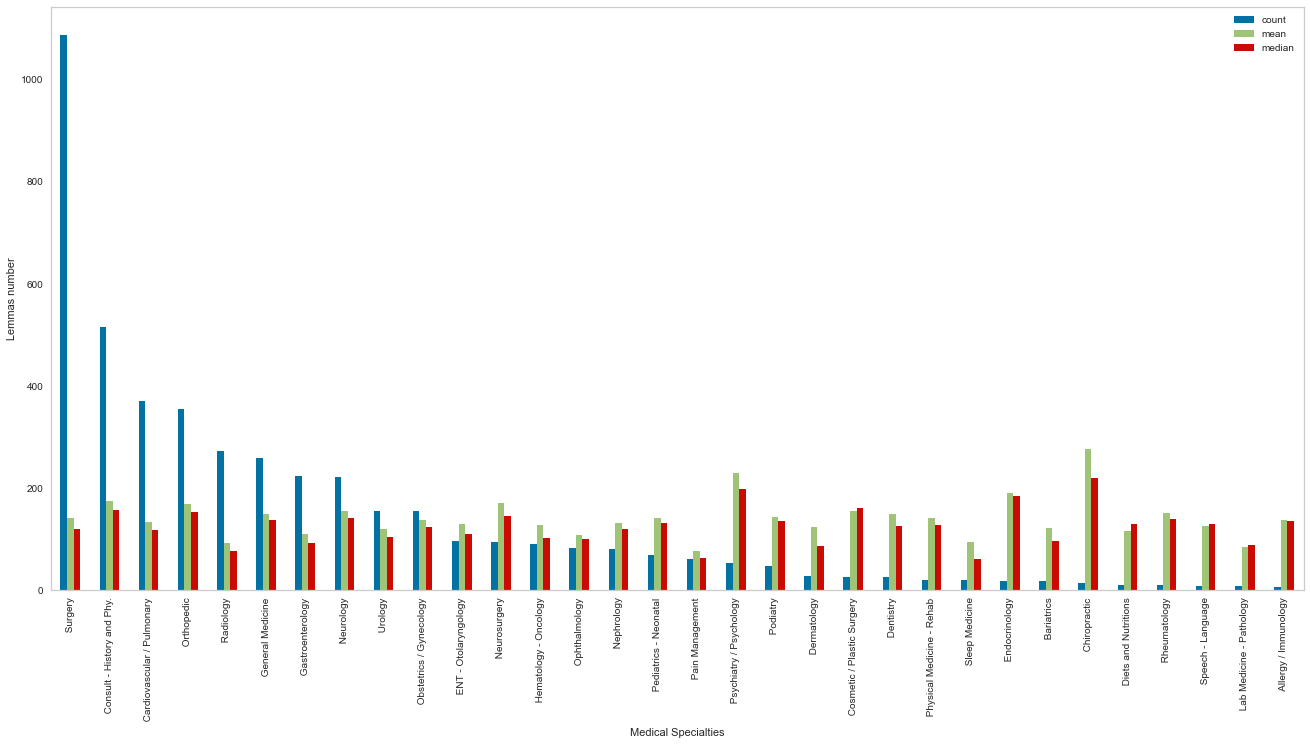

In [56]:
# A good snapshot: in our corpus there is a great number of texts for Surgery, but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)

In [57]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,subjective this -year-old white female pres...,"['subjective', 'this', '-year-old', 'white', '...","[(subjective, NN), (this, DT), (-year-old, JJ)...","[(subjective, NN), (female, NN), (presents, NN...","[subjective, female, present, complaint, aller...",49,209
1,Consult for laparoscopic gastric bypass.,Bariatrics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348
2,Consult for laparoscopic gastric bypass.,Bariatrics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement with left...,"['-d', 'm-mode', 'left', 'atrial', 'enlargemen...","[(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...","[(m-mode, NN), (enlargement, NN), (diameter, N...","[m-mode, enlargement, diameter, cm, size, righ...",22,62
4,2-D Echocardiogram,Cardiovascular / Pulmonary,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221
...,...,...,...,...,...,...,...,...,...
4961,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[(history, NN), (i, NN), (had, VBD), (the, DT)...","[(history, NN), (i, NN), (pleasure, NN), (meet...","[history, i, pleasure, meeting, patient, today...",245,792
4962,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,admitting diagnosis kawasaki disease discharg...,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","[(diagnosis, NN), (kawasaki, NN), (disease, NN...","[diagnosis, kawasaki, disease, discharge, diag...",79,262
4963,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a -year-old white female ...,"['subjective', 'this', 'is', 'a', '-year-old',...","[(subjective, NN), (this, DT), (is, VBZ), (a, ...","[(subjective, NN), (female, NN), (today, NN), ...","[subjective, female, today, physical, asthma, ...",185,716
4964,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this -year-old male presents ...,"['chief', 'complaint', 'this', '-year-old', 'm...","[(chief, JJ), (complaint, NN), (this, DT), (-y...","[(complaint, NN), (male, NN), (presents, NNS),...","[complaint, male, present, child, hospital, em...",136,396


In [58]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language          

In [59]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology   

In [60]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [61]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

In [62]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4965
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   transcription      4514 non-null   object
 3   tokenized_sents    4514 non-null   object
 4   POSTags            4514 non-null   object
 5   Nouns              4514 non-null   object
 6   lemmatize          4514 non-null   object
 7   lemmatize_count    4514 non-null   int64 
 8   tokens             4514 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 512.7+ KB


In [64]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of Lemma
data = data[(data['lemmatize_count'] >= 60) & (data['lemmatize_count'] <= 250)]
print(data['lemmatize_count'].min())
print(data['lemmatize_count'].max())

60
250


In [65]:
data['medical_specialty'].nunique()

27

In [66]:
data['medical_specialty'].value_counts()

 Surgery                       818
 Consult - History and Phy.    396
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Podiatry                       25
 Dentistry                      25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [67]:
print(data['tokens'].min())
print(data['tokens'].max())

102
969


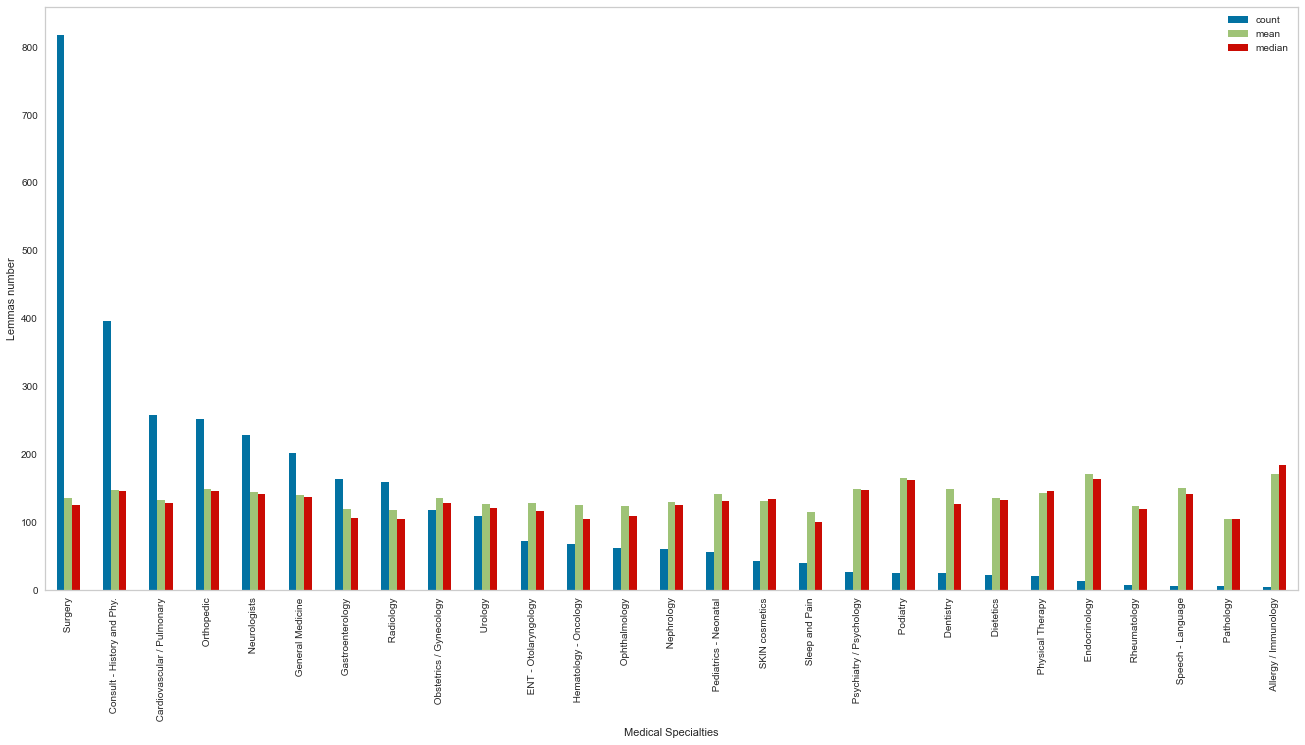

In [68]:
# Cleaned snapshot
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('plots/Corpus_view_with_Lemmas_after_first_reduction.png')

In [69]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,818,135.338631,126.0
Consult - History and Phy.,396,147.989899,147.0
Cardiovascular / Pulmonary,259,133.814672,128.0
Orthopedic,253,149.158103,146.0
Neurologists,229,144.510917,142.0
General Medicine,203,141.088670,138.0
Gastroenterology,164,119.542683,107.0
Radiology,160,117.881250,105.0
Obstetrics / Gynecology,119,136.747899,129.0


In [70]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
1717,Cardiolite treadmill exercise stress test. T...,Radiology,cardiolite treadmill exercise stress test clin...,"['cardiolite', 'treadmill', 'exercise', 'stres...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[(cardiolite, NN), (treadmill, NN), (exercise,...","[cardiolite, treadmill, exercise, stress, test...",67,193
4289,Local reaction secondary to insect sting. Pa...,Consult - History and Phy.,history of present illness patient is a -ye...,"['history', 'of', 'present', 'illness', 'patie...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (patient, NN), (male, NN), (wi...","[history, patient, male, wife, bee, hand, hand...",117,473
2382,"Cataract, right eye. Phacoemulsification wit...",Ophthalmology,preoperative diagnosis cataract right eye po...,"['preoperative', 'diagnosis', 'cataract', 'rig...","[(preoperative, JJ), (diagnosis, NN), (catarac...","[(diagnosis, NN), (cataract, NN), (eye, NN), (...","[diagnosis, cataract, eye, diagnosis, cataract...",90,298
4024,Nipple areolar reconstruction utilizing a ful...,SKIN cosmetics,preoperative diagnoses surgical absence of le...,"['preoperative', 'diagnoses', 'surgical', 'abs...","[(preoperative, JJ), (diagnoses, NNS), (surgic...","[(diagnoses, NNS), (absence, NN), (areola, NN)...","[diagnosis, absence, areola, history, breast, ...",179,610
2199,Hardware removal in the left elbow.,Orthopedic,preoperative diagnosis retained hardware in le...,"['preoperative', 'diagnosis', 'retained', 'har...","[(preoperative, JJ), (diagnosis, NN), (retaine...","[(diagnosis, NN), (hardware, NN), (elbow, NN),...","[diagnosis, hardware, elbow, diagnosis, hardwa...",121,365


In [71]:
# Decided to introduce an upperdown level for most populated categories
data_all_surgery = data[data['medical_specialty'] == ' Surgery']

In [72]:
data_all_surgery 

,description,medical_specialty,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens
179,Wound debridement with removal of Surgisis xe...,Surgery,preoperative diagnoses open wound from right ...,"['preoperative', 'diagnoses', 'open', 'wound',...","[(preoperative, JJ), (diagnoses, NNS), (open, ...","[(diagnoses, NNS), (axilla, NN), (abdomen, NNS...","[diagnosis, axilla, abdomen, vascular, graft, ...",87,344
180,Visually significant posterior capsule opacit...,Surgery,preoperative diagnosis visually significant p...,"['preoperative', 'diagnosis', 'visually', 'sig...","[(preoperative, JJ), (diagnosis, NN), (visuall...","[(diagnosis, NN), (capsule, NN), (opacity, NN)...","[diagnosis, capsule, opacity, eye, diagnosis, ...",66,207
183,Placement of right new ventriculoperitoneal (...,Surgery,title of operation placement of right new vent...,"['title', 'of', 'operation', 'placement', 'of'...","[(title, NN), (of, IN), (operation, NN), (plac...","[(title, NN), (operation, NN), (placement, NN)...","[title, operation, placement, ventriculoperito...",75,268
188,Unilateral transpedicular T11 vertebroplasty.,Surgery,preoperative diagnosis tcompression fracture ...,"['preoperative', 'diagnosis', 'tcompression', ...","[(preoperative, JJ), (diagnosis, NN), (tcompre...","[(diagnosis, NN), (tcompression, NN), (fractur...","[diagnosis, tcompression, fracture, pain, diag...",105,356
189,Insertion of a VVIR permanent pacemaker. Thi...,Surgery,procedure performed insertion of a vvir perma...,"['procedure', 'performed', 'insertion', 'of', ...","[(procedure, NN), (performed, VBD), (insertion...","[(procedure, NN), (insertion, NN), (pacemaker,...","[procedure, insertion, pacemaker, complication...",189,602
...,...,...,...,...,...,...,...,...,...
1259,Removal of the hardware and revision of right...,Surgery,preoperative diagnosis right ac separation p...,"['preoperative', 'diagnosis', 'right', 'ac', '...","[(preoperative, JJ), (diagnosis, NN), (right, ...","[(diagnosis, NN), (separation, NN), (diagnosis...","[diagnosis, separation, diagnosis, separation,...",61,210
1260,"Excision of abscess, removal of foreign body....",Surgery,preoperative diagnosis recurrent re-infected s...,"['preoperative', 'diagnosis', 'recurrent', 're...","[(preoperative, JJ), (diagnosis, NN), (recurre...","[(diagnosis, NN), (recurrent, NN), (cyst, NN),...","[diagnosis, recurrent, cyst, abdomen, diagnosi...",91,344
1261,Congenital chylous ascites and chylothorax an...,Surgery,preoperative diagnoses congenital chylous ...,"['preoperative', 'diagnoses', 'congenital', 'c...","[(preoperative, JJ), (diagnoses, NNS), (congen...","[(diagnoses, NNS), (ascites, NNS), (chylothora...","[diagnosis, ascites, chylothorax, rule, leak, ...",214,823
1262,Incision and drainage (I&D) of abdominal absc...,Surgery,preoperative diagnosis abdominal wall abscess ...,"['preoperative', 'diagnosis', 'abdominal', 'wa...","[(preoperative, JJ), (diagnosis, NN), (abdomin...","[(diagnosis, NN), (wall, NN), (abscess, NN), (...","[diagnosis, wall, abscess, diagnosis, wall, pr...",91,313


In [73]:
data_no_surgery = data[data['medical_specialty'] != ' Surgery']

In [74]:
random_data_surgery = data_all_surgery.sample(n=250)

In [75]:
data = pd.concat([data_no_surgery, random_data_surgery])

In [76]:
data_all_consultancy = data[data['medical_specialty'] == ' Consult - History and Phy.']

In [77]:
data_no_consultancy = data[data['medical_specialty'] != ' Consult - History and Phy.']

In [78]:
random_data_consultancy = data_all_consultancy.sample(n=250)

In [79]:
data = pd.concat([data_no_consultancy, random_data_consultancy])

In [80]:
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Consult - History and Phy.    250
 Surgery                       250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Dentistry                      25
 Podiatry                       25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [81]:
data = data.replace({' Pediatrics - Neonatal': " Others", " SKIN cosmetics": ' Others',' Sleep and Pain': ' Others',
                     ' Psychiatry / Psychology':' Others', ' Dentistry': ' Others', ' Podiatry':' Others'})
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Surgery                       250
 Consult - History and Phy.    250
 Neurologists                  229
 Others                        219
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [82]:
data = data.replace({' Dietetics': " Others", " Physical Therapy": ' Others',' Endocrinology': ' Others',
                     ' Rheumatology':' Others', ' Speech - Language': ' Others', ' Pathology':' Others', ' Allergy / Immunology': ' Others' })
data['medical_specialty'].value_counts()

 Others                        303
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Surgery                       250
 Consult - History and Phy.    250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
Name: medical_specialty, dtype: int64

In [83]:
data.shape

(2563, 9)

In [84]:
# data['lemmatize_to_string']= data['lemmatize'].astype('str')
data['lemmatize_to_string']= data['lemmatize'].str.join(" ")
type(data['lemmatize_to_string'])

pandas.core.series.Series

# Baseline accuracy
It sets the benchmark in terms of minimum accuracy which the model should achieve. It is calculated as the number of times the majority class appears in the target variable, divided by the total number of observations.

In [85]:
print(303/2563)

0.11822083495903238


# Creating the Model

In [86]:
#Creating the label and Creating the Training and Test Datasets
#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(2563, 9) (2563,)


In [87]:
X

,description,transcription,tokenized_sents,POSTags,Nouns,lemmatize,lemmatize_count,tokens,lemmatize_to_string
1,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[(past, JJ), (medical, JJ), (history, NN), (he...","[(history, NN), (difficulty, NN), (stairs, NNS...","[history, difficulty, stair, difficulty, airli...",129,348,history difficulty stair difficulty airline se...
2,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (i, NN), (abc, ...","[history, illness, i, abc, today, gentleman, y...",213,704,history illness i abc today gentleman year pou...
4,2-D Echocardiogram,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[(the, DT), (left, NN), (ventricular, JJ), (ca...","[(left, NN), (cavity, NN), (size, NN), (wall, ...","[left, cavity, size, wall, thickness, wall, mo...",65,221,left cavity size wall thickness wall motion fu...
5,Morbid obesity. Laparoscopic antecolic anteg...,preoperative diagnosis morbid obesity postope...,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[(preoperative, JJ), (diagnosis, NN), (morbid,...","[(diagnosis, NN), (morbid, NN), (obesity, NN),...","[diagnosis, morbid, obesity, diagnosis, morbid...",231,719,diagnosis morbid obesity diagnosis morbid obes...
6,"Liposuction of the supraumbilical abdomen, re...",preoperative diagnoses deformity right breast...,"['preoperative', 'diagnoses', 'deformity', 'ri...","[(preoperative, JJ), (diagnoses, NNS), (deform...","[(diagnoses, NNS), (deformity, NN), (breast, N...","[diagnosis, deformity, breast, reconstruction,...",175,599,diagnosis deformity breast reconstruction tiss...
...,...,...,...,...,...,...,...,...,...
4286,"Chief complaint of chest pain, previously dia...",history patient is a -year-old white woman w...,"['history', 'patient', 'is', 'a', '-year-old',...","[(history, NN), (patient, NN), (is, VBZ), (a, ...","[(history, NN), (patient, NN), (woman, NN), (c...","[history, patient, woman, complaint, chest, pa...",164,475,history patient woman complaint chest pain hyp...
4470,"A 37-year-old admitted through emergency, pre...",reason for consultation chest pain history o...,"['reason', 'for', 'consultation', 'chest', 'pa...","[(reason, NN), (for, IN), (consultation, NN), ...","[(reason, NN), (consultation, NN), (chest, NN)...","[reason, consultation, chest, pain, history, i...",150,397,reason consultation chest pain history illness...
4327,The patient is a 61-year-old lady who was fou...,history of present illness goes back to yester...,"['history', 'of', 'present', 'illness', 'goes'...","[(history, NN), (of, IN), (present, JJ), (illn...","[(history, NN), (illness, NN), (yesterday, NN)...","[history, illness, yesterday, patient, dinner,...",180,532,history illness yesterday patient dinner boyfr...
4462,Marked right hydronephrosis without hydruria.,chief complaint right hydronephrosis history...,"['chief', 'complaint', 'right', 'hydronephrosi...","[(chief, JJ), (complaint, NN), (right, JJ), (h...","[(complaint, NN), (hydronephrosis, NN), (histo...","[complaint, hydronephrosis, history, illness, ...",97,346,complaint hydronephrosis history illness patie...


In [88]:
y.nunique()

15

In [89]:
y.unique()

array([' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.'],
      dtype=object)

In [90]:
y

1                            Others
2                            Others
4        Cardiovascular / Pulmonary
5                            Others
6                            Others
                   ...             
4286     Consult - History and Phy.
4470     Consult - History and Phy.
4327     Consult - History and Phy.
4462     Consult - History and Phy.
4202     Consult - History and Phy.
Name: medical_specialty, Length: 2563, dtype: object

In [91]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [92]:
#We imports the module for creating training and test data sets.
from sklearn.model_selection import train_test_split

#The third line creates the training (X_train, y_train) and test set (X-test, y_test) arrays,  The 'random_state' argument ensures that the results are reproducible.
X_train, X_test, y_train, y_test = train_test_split(data['lemmatize_to_string'], y, test_size=0.30, random_state=100)

#The fourth line prints the shape of the overall, training and test dataset, respectively.
print(data.shape); print(X_train.shape); print(X_test.shape)

(2563, 10)
(1794,)
(769,)


In [93]:
X_train

1764    data psychosis history illness patient samoan ...
1586    cc onset blindness hx y/o rhf state / / tongue...
4942    history illness mr abc gentleman stress test t...
2062    diagnosis ankle sprain history patient female ...
2367    diagnosis globe prolapse ox diagnosis globe pr...
                              ...                        
1827    complaint foot history illness school athlete ...
4773    indication pain interpretation heart rate bloo...
111     diagnosis hypospadias diagnosis hypospadias pr...
4678    reason consult effusion history illness patien...
3541    complaint stomach pain week history illness pa...
Name: lemmatize_to_string, Length: 1794, dtype: object

In [94]:
X_test

1203    diagnosis acute appendicitis diagnosis acute a...
4313    complaint baby fever hour history illness infa...
4255    reason visit patient evaluation mr meningioma ...
516     diagnosisleft breast mass mammogram diagnosis ...
1717    cardiolite treadmill exercise stress test data...
                              ...                        
3027    diagnosis disease vein occlusion status post t...
1021    procedure system cineangiography system cinean...
587     diagnosis pregnancy week testing induction dia...
3286    patient headache spell rash right calf dizzine...
335     diagnosis mass skin lesion diagnosis mass skin...
Name: lemmatize_to_string, Length: 769, dtype: object

In [95]:
y_train

1764                         Others
1586                      Radiology
4942     Cardiovascular / Pulmonary
2062                     Orthopedic
2367                  Ophthalmology
                   ...             
1827                         Others
4773     Cardiovascular / Pulmonary
111                         Urology
4678     Cardiovascular / Pulmonary
3541               Gastroenterology
Name: medical_specialty, Length: 1794, dtype: object

In [96]:
y_test

1203                        Surgery
4313     Consult - History and Phy.
4255     Consult - History and Phy.
516                         Surgery
1717                      Radiology
                   ...             
3027                     Nephrology
1021                        Surgery
587                         Surgery
3286               General Medicine
335                         Surgery
Name: medical_specialty, Length: 769, dtype: object

<!-- # Converting Text to Word Frequency Vectors with TfidfVectorizer.

We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one. -->

In [97]:
type(X_train)

pandas.core.series.Series

In [98]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 1:
                continue
            tokens.append(word)
    return tokens

In [99]:
X_train.shape

(1794,)

In [100]:
y_train

1764                         Others
1586                      Radiology
4942     Cardiovascular / Pulmonary
2062                     Orthopedic
2367                  Ophthalmology
                   ...             
1827                         Others
4773     Cardiovascular / Pulmonary
111                         Urology
4678     Cardiovascular / Pulmonary
3541               Gastroenterology
Name: medical_specialty, Length: 1794, dtype: object

In [101]:
from gensim.models.doc2vec import TaggedDocument

In [102]:
# The input for a Doc2Vec model should be a list of TaggedDocument(['list','of','word'], [TAG_001]). 
#A good practice is using the indexes of sentences as the tags. For example, to train a Doc2Vec model with two sentences (i.e. documents, paragraphs):
#I made two lists for trained tagged documents

train_tagged_document = []
for index ,value in X_train.items():
    train_tagged_document.append(TaggedDocument(words=tokenize_text(value), tags=[y_train[index]]))

In [103]:

train_tagged_document

[TaggedDocument(words=['data', 'psychosis', 'history', 'illness', 'patient', 'samoan', 'female', 'grandmother', 's', 'caretaker', 'grandmother', 'patient', 'behavior', 'parent', 'son', 'parent', 'son', 'home', 'secondary', 'patient', 'behavior', 'police', 'department', 'highway', 'history', 'ptsd', 'depression', 'substance', 'abuse', 'history', 'allergy', 'medication', 'review', 'system', 'patient', 'seclusion', 'sign', 'blood', 'pressure', '/', 'pulse', 'respiration', 'temperature', 'degree', 'appearance', 'heent', 'history', 'examination', 'today', 'patient', 'seclusion', 'laboratory', 'data', 'laboratory', 'bmp', 'glucose', 'tox', 'urinalysis', 'wbc', 's', 'cbc', 'leukocytosis', 'range', 'psychosis', 'inpatient', 'team', 'axis', 'ii', 'iii', 'examination', 'patient', 'today', 'seclusion', 'laboratory', 'leukocytosis', 'uti', 'patient', 'seclusion', 'examination', 'complaint', 'dysuria', 'pain', 'therapy', 'patient', 'issue'], tags=[' Others']),
 TaggedDocument(words=['cc', 'onset', 

In [104]:
# test_tagged tagged documents

test_tagged_document = []
for index, value in X_test.items():
    test_tagged_document.append(TaggedDocument(words=tokenize_text(value), tags=[y_test[index]]))

In [105]:
test_tagged_document

[TaggedDocument(words=['diagnosis', 'acute', 'appendicitis', 'diagnosis', 'acute', 'appendicitis', 'procedure', 'indication', 'patient', 'gentleman', 'hospital', 'onset', 'pain', 'history', 'sign', 'symptom', 'appendicitis', 'i', 'patient', 'emergency', 'room', 'procedure', 'procedure', 'risk', 'benefit', 'complication', 'form', 'therapy', 'finding', 'patient', 'appendicitis', 'appendix', 'suppuration', 'patient', 'operating', 'room', 'induction', 'endotracheal', 'abdomen', 'solution', 'fashion', 'incision', 'dissection', 'level', 'fascia', 'allis', 'clamp', 'stay', 'suture', 'vicryl', 'side', 'midline', 'fascia', 'peritoneum', 'blunt', 'finger', 'dissection', 'hasson', 'cannula', 'pneumoperitoneum', 'pressure', 'patient', 'position', 'whereupon', 'vision', 'midline', '-mm', 'midclavicular', 'port', 'appendix', 'babcock', 's', 'window', 'mesoappendix', 'appendix', 'cecum', 'endo', 'gia', 'appendix', 'base', 'cecum', 'mesoappendix', 'endo', 'gia', 'staple', 'appendix', 'bag', 'cavity', 

In [106]:
#Import gensim 
import gensim

In [107]:
#Instantiating the model and iterating the training corpus 10 times. 
#We set the minimum word count to 2 in order to discard words with very few occurrences. 

model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=10)

In [108]:
#Build a vocabulary = the vocabulary is a list of all of the unique words extracted from the training corpus. 
model.build_vocab(train_tagged_document)

In [109]:
# Now we have a trained Doc2Vec paragraph embedding.
model.train(train_tagged_document, total_examples=model.corpus_count, epochs=model.epochs)

In [110]:
len(model.docvecs)

15

In [111]:
#we need to extract the vectors from the model. Extract training vectors:
X_train_new = np.array([model.docvecs[tag_value] for tag_value in y_train.values.tolist() ])
y_train_new = y_train.values.tolist()

In [112]:
y_train_new

[' Others',
 ' Radiology',
 ' Cardiovascular / Pulmonary',
 ' Orthopedic',
 ' Ophthalmology',
 ' Ophthalmology',
 ' Orthopedic',
 ' Consult - History and Phy.',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Surgery',
 ' Nephrology',
 ' Orthopedic',
 ' Others',
 ' Orthopedic',
 ' Neurologists',
 ' Radiology',
 ' Cardiovascular / Pulmonary',
 ' Orthopedic',
 ' Neurologists',
 ' Orthopedic',
 ' Nephrology',
 ' Hematology - Oncology',
 ' Urology',
 ' Gastroenterology',
 ' Obstetrics / Gynecology',
 ' Consult - History and Phy.',
 ' Neurologists',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Neurologists',
 ' Neurologists',
 ' Others',
 ' Neurologists',
 ' Neurologists',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Neurologists',
 ' Neurologists',
 ' Gastroenterology',
 ' Nephrology',
 ' Orthopedic',
 ' Consult - History and Phy.',
 ' Cardiovascular / Pulmonary',
 ' Urology',
 ' Radiology',
 ' Orthopedic',
 ' Gastroenterology',
 ' Neurologists',
 ' Radiology',
 ' Gastroenterology',


In [113]:
X_train_new 

array([[-1.5489929 , -5.3319464 , -6.403383  , ..., -4.896072  ,
        -0.1875918 , -0.45487472],
       [-1.478766  , -1.897141  , -4.4016595 , ..., -2.240935  ,
         6.7431216 ,  0.17615117],
       [-3.127568  , -3.8927066 , -3.080357  , ...,  3.4438787 ,
         2.6179545 , -0.31225935],
       ...,
       [-3.891832  , -2.0563393 ,  1.6895162 , ..., -3.4617412 ,
         2.2359216 , -1.5232222 ],
       [-3.127568  , -3.8927066 , -3.080357  , ...,  3.4438787 ,
         2.6179545 , -0.31225935],
       [-1.0516945 , -1.6187917 , -3.2665648 , ..., -1.8273377 ,
         1.7768089 ,  2.720753  ]], dtype=float32)

In [114]:
#Use ‘infer_vector’ to generate vectors for the test set:
X_test_new = np.array([model.infer_vector(test_tagged_document[i][0]) for i in range(len(test_tagged_document))])

In [115]:
X_test_new

array([[-0.71438265, -0.45111594, -0.23462328, ..., -0.3222239 ,
         0.45076588,  0.00220652],
       [-1.0277408 , -0.4337769 , -0.6461373 , ..., -0.4356181 ,
         0.10169452,  0.02420654],
       [-0.7523313 , -0.5574792 , -0.5497826 , ..., -0.1836101 ,
         0.27745518, -0.06088832],
       ...,
       [-0.6562546 , -0.34293315, -0.3028591 , ..., -0.3093486 ,
         0.7612788 , -0.11633313],
       [-1.0738286 , -0.76949483, -0.4592463 , ..., -0.28315446,
         0.33644924, -0.06668683],
       [-1.3960431 , -0.9320526 , -0.681683  , ..., -0.17020436,
         0.8891639 , -0.07772471]], dtype=float32)

In [116]:
y_test_new = y_test.values.tolist()

In [117]:
y_test_new

[' Surgery',
 ' Consult - History and Phy.',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Radiology',
 ' Others',
 ' Neurologists',
 ' Surgery',
 ' Others',
 ' Cardiovascular / Pulmonary',
 ' Cardiovascular / Pulmonary',
 ' Orthopedic',
 ' Consult - History and Phy.',
 ' Others',
 ' Gastroenterology',
 ' Orthopedic',
 ' Hematology - Oncology',
 ' Radiology',
 ' Others',
 ' Orthopedic',
 ' Neurologists',
 ' Cardiovascular / Pulmonary',
 ' Radiology',
 ' Orthopedic',
 ' Radiology',
 ' Cardiovascular / Pulmonary',
 ' Others',
 ' Surgery',
 ' Others',
 ' Radiology',
 ' Nephrology',
 ' Obstetrics / Gynecology',
 ' Cardiovascular / Pulmonary',
 ' Neurologists',
 ' Consult - History and Phy.',
 ' General Medicine',
 ' Consult - History and Phy.',
 ' Cardiovascular / Pulmonary',
 ' General Medicine',
 ' Others',
 ' Consult - History and Phy.',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Others',
 ' Surgery',
 ' Urology',
 ' Neurologists',
 ' Nephrology',
 ' Orthopedic',
 ' Surgery',
 ' 

In [118]:
from yellowbrick.text import TSNEVisualizer

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

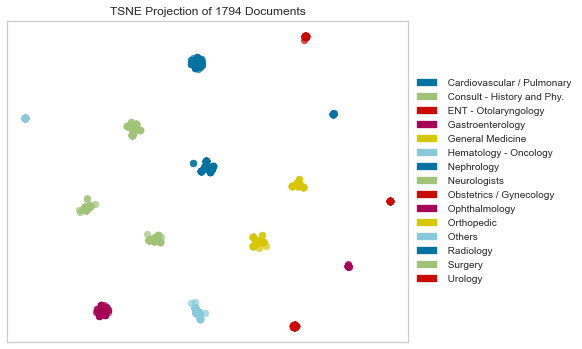

<AxesSubplot:title={'center':'TSNE Projection of 1794 Documents'}>

In [119]:
#Visualizing Word Embedding with t-SNE

#To visualize the relationships between the vector representations of the lectures, we will use t-distributed stochastic neighborhood embedding (t-SNE ) 
#to reduce the dimensionality of the data. By decomposing high-dimensional document vectors 
#into 2 dimensions using probability distributions from both the original dimensionality and the decomposed dimensionality, 
#t-SNE is able to effectively cluster similar documents. 
#By decomposing to 2 or 3 dimensions, the documents can be visualized with a scatter plot.
#t-SNE is a non-linear dimension reduction method. With t-SNE, the algorithm calculates the similarity in both high dimensional space and low dimensional space. Next, the similarity difference in both spaces is minimized using an optimization method, 
#for example gradient descend method.

tsne = TSNEVisualizer(decompose_by=15)
tsne.fit(X_train_new, y_train_new)
tsne.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

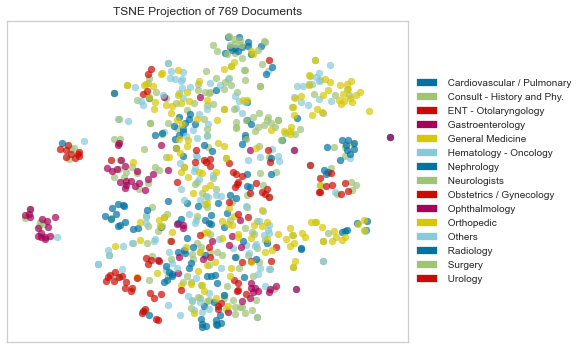

<AxesSubplot:title={'center':'TSNE Projection of 769 Documents'}>

In [120]:
tsne = TSNEVisualizer(decompose_by=15)
tsne.fit(X_test_new, y_test_new)
tsne.show()

#  Examine the Default Random Forest to Determine Parameters

In [125]:
from sklearn.ensemble import RandomForestClassifier

from pprint import pprint
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)

# Look at parameters used by Random Forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [126]:
# Create a random forest classifier
rf = rf.fit(X_train_new, y_train_new)
rf.score(X_test_new, y_test_new)

0.08842652795838751

# Random Search with Cross Validation

In [127]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [128]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, 
                            param_distributions=random_grid,
                            n_iter = 100, 
                            scoring='neg_mean_absolute_error', 
                            cv = 3, 
                            verbose=2, 
                            random_state=42, 
                            n_jobs= 1,
                            return_train_score=True)

# Fit the random search model


In [129]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train_new)
encoded_y = label_encoder.transform(y_train_new)
encoded_y 

array([11, 12,  0, ..., 14,  0,  3])

In [130]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [131]:
rf_random.fit(X_train_new, one_hot_y);

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   2.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  10.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  10.4s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   6.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  12.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  14.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  16.0s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  14.5s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  16.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  17.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=  10.8s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   9.2s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   9.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   4.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   4.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   6.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  10.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  10.7s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  13.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, mi

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   9.6s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  10.0s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   9.6s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   8.5s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, 

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   5.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   6.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=  11.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=  11.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   1.1s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  10.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  11.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  10.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=600

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  11.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  10.5s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  13.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   4.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 45.0min finished


# Evaluate the Best Random Search Model

In [133]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=400)

In [134]:
y_test_new

[' Surgery',
 ' Consult - History and Phy.',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Radiology',
 ' Others',
 ' Neurologists',
 ' Surgery',
 ' Others',
 ' Cardiovascular / Pulmonary',
 ' Cardiovascular / Pulmonary',
 ' Orthopedic',
 ' Consult - History and Phy.',
 ' Others',
 ' Gastroenterology',
 ' Orthopedic',
 ' Hematology - Oncology',
 ' Radiology',
 ' Others',
 ' Orthopedic',
 ' Neurologists',
 ' Cardiovascular / Pulmonary',
 ' Radiology',
 ' Orthopedic',
 ' Radiology',
 ' Cardiovascular / Pulmonary',
 ' Others',
 ' Surgery',
 ' Others',
 ' Radiology',
 ' Nephrology',
 ' Obstetrics / Gynecology',
 ' Cardiovascular / Pulmonary',
 ' Neurologists',
 ' Consult - History and Phy.',
 ' General Medicine',
 ' Consult - History and Phy.',
 ' Cardiovascular / Pulmonary',
 ' General Medicine',
 ' Others',
 ' Consult - History and Phy.',
 ' Consult - History and Phy.',
 ' Surgery',
 ' Others',
 ' Surgery',
 ' Urology',
 ' Neurologists',
 ' Nephrology',
 ' Orthopedic',
 ' Surgery',
 ' 

In [135]:
label_encoder.fit(y_test_new)
encoded_test = label_encoder.transform(y_test_new)
encoded_test 

array([13,  1,  1, 13, 12, 11,  7, 13, 11,  0,  0, 10,  1, 11,  3, 10,  5,
       12, 11, 10,  7,  0, 12, 10, 12,  0, 11, 13, 11, 12,  6,  8,  0,  7,
        1,  4,  1,  0,  4, 11,  1,  1, 13, 11, 13, 14,  7,  6, 10, 13,  1,
       14, 10,  2, 10,  2, 12,  6,  0,  7, 13, 11, 11,  0,  1, 10,  8, 10,
        3,  4,  3, 11,  9, 12,  4, 13, 13,  0,  4, 13,  8, 12,  1,  1,  6,
       10,  1,  9,  1,  8,  4, 12,  1, 13,  7,  1,  1, 10, 11, 14,  1,  3,
        6,  8,  5,  0, 14,  0, 13,  1,  7,  3, 14,  7,  2, 10, 12, 11,  1,
        3,  2, 11, 11,  1, 12,  2, 13, 11,  4,  1,  3, 11, 11,  3,  8, 11,
       13,  0,  7,  5,  3,  4,  4, 11, 11,  0,  4,  1, 10,  8, 14,  7,  1,
        0,  8,  3,  1,  2, 13, 14, 13,  2, 11,  1,  7, 11,  0,  0,  4,  0,
       10, 13,  4,  0, 14,  0, 14,  3,  0, 13, 12, 12, 13, 11, 13,  1, 13,
        1,  7,  4, 11, 13, 11,  4,  7, 12,  7, 12, 14,  4,  0, 12,  3,  3,
        4,  4,  4,  4,  3,  4,  2,  5, 10, 11, 11, 12,  6,  1, 11,  8,  9,
       10, 10,  7,  8,  2

In [136]:
from keras.utils import to_categorical
# Step 2: One-hot encoding
one_hot_test = to_categorical(encoded_test)
one_hot_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [139]:
print(f"Training Data Score: {rf.score(X_test_new, y_test_new)}")
print(f"Testing Data Score: {rf_random.score(X_test_new, one_hot_test)}")

Training Data Score: 0.08842652795838751
Testing Data Score: -0.06666667014360428


In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_new, y_train_new)
base_accuracy = score(X_test_new, y_test_new)

In [ ]:
print(f"Training Data Score: {scores_train}")
print(f"Testing Data Score: {scores_test}")

In [ ]:
predictions = model.predict(X_test_new)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test_new[:10]}")

In [ ]:
pd.DataFrame({"Prediction": predictions[:10], "Actual": y_test_new[:10]}).reset_index(drop=True)

In [ ]:
#we can actually see that the model is overfitting the training data. Our model is not generalizing well on the testing data
#one of the strategy to get them 

In [ ]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(LogisticRegression(),support=True,size=(900, 600))
viz.fit(X_train_new, y_train_new)
viz.score(X_test_new, y_test_new)
viz.show()

In [ ]:
#ROBE DEL TIXIO!!@!

In [ ]:
# from gensim.models.doc2vec import TaggedDocument

# train_corpus = []

# for i in X_train.index:
#     doc = TaggedDocument(X_train[i].split(" "), y_train[i])   
#     train_corpus.append(doc)

In [ ]:
# train_corpus

In [ ]:
# import gensim

In [ ]:
# from gensim.models.doc2vec import *

In [ ]:
# # Declare hyperparamters 
# vec_size = 20
# min_count = 2
# epochs = 20
# alpha = 0.025
# min_alpha = 0.025

In [ ]:
# model_ch = Doc2Vec(vector_size=vec_size,
#                 min_count=min_count,
#                 epochs=epochs,
#                 alpha = alpha,
#                 min_alpha = min_alpha)

# model_ch.build_vocab(train_corpus)

# %time model_ch.train(train_corpus, total_examples=model_ch.corpus_count, epochs=model_ch.epochs)

In [ ]:
# inferred_vector = model_ch.infer_vector(test_corpus[60])
# sims = model_ch.docvecs.most_similar([inferred_vector])
# print(inferred_vector)

# potential option if theres time

In [ ]:
# doc_vectors = [model_ch.infer_vector(train_corpus[i].words) for i in range(0,len(train_corpus))]

In [ ]:
# model_ch

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 3)
# pca.fit(doc_vectors)
# doc_vectors_3d = pca.transform(doc_vectors) # transform the vectors to 3d space
# explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)[2]
# explained_variance_ratio

In [ ]:
# # create a list of specailtys
# specialties = data["medical_specialty"].unique()

In [ ]:
# num = list(range(0,len(specialties)))
# specialty_num = dict(zip(specialties, num))

In [ ]:
# # Dataframes for plotting
# doc_vectors_3d = pd.DataFrame(doc_vectors_3d)  

# # by author
# specialties_df = pd.DataFrame([train_corpus[i].tags for i in range(0, len(train_corpus))])
# doc_vectors_3d_with_specialty =pd.concat([doc_vectors_3d,specialties_df], axis = 1)
# doc_vectors_3d_with_specialty.columns = ['x','y','z','Specialties']
# doc_vectors_3d_with_specialty['Specialties'] = doc_vectors_3d_with_specialty['Specialties'].map(specialty_num)

In [ ]:
# def color_map(category):
# #     setting color map
#     cmap = plt.cm.inferno
#     cmaplist = [cmap(i) for i in range(cmap.N)]
#     jump = 256//len(category)
#     cmaplist_ = [cmaplist[jump*i] for i in range(0,len(category))]
#     return cmaplist_

# cmap_spec = color_map(specialties)

In [ ]:
# specialties_df

In [ ]:
# doc_vectors_3d.head()

In [ ]:
# doc_vectors_3d_with_specialty.head()

In [ ]:
# import chart_studio.plotly as py
# # import chart_studio.graph_objs as goo
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# # by author
# traces_for_plot = []
# for key, value in specialty_num.items():
#     df = doc_vectors_3d_with_specialty[doc_vectors_3d_with_specialty['Specialties'] == value]
#     traces_for_plot.append(df)

# traces_Specialties = []
# for trace in traces_for_plot:
#     trace1 = go.Scatter3d(
#     x = trace['x'],
#     y = trace['y'],
#     z = trace['z'],
#     mode='markers',
#     name = specialties[trace['Specialties'].values[0]],
#     marker=dict(
#         size=5,
#         color= 'rgba' + str(cmap_spec[(trace['Specialties'].values[0])]),
#     )
#     )
#     traces_Specialties.append(trace1)

# layout = go.Layout(showlegend=True)
# # # Make a figure object
# fig = go.Figure(data= traces_Specialties, layout = layout)

# # Send to Plotly and show in notebook
# iplot(fig, filename='test1')

# Converting Text to Word Frequency Vectors with TfidfVectorizer.

We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one.

In [ ]:
# TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. 
#It is used as a weighting factor in text mining applications.

# Term Frequency (TF): This summarizes the normalized Term Frequency within a document.

# Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. 

#In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. 
#We will work on creating TF-IDF vectors for our documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data['lemmatize_to_string'])
y = y
tsne = TSNEVisualizer(decompose_by=15)
tsne.fit(X,y)
tsne.show()

In [ ]:
# The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
from sklearn.feature_extraction.text import TfidfVectorizer

# The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
vectorizer_tfidf = TfidfVectorizer()

# The third line fits and transforms the training data.
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

# The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

In [ ]:
# Let's look at the shape of the transformed TF-IDF train and test datasets. 
# The following line of code performs this task.
print(train_tfIdf.shape); print(test_tfIdf.shape)

In [ ]:
print(train_tfIdf)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# The fourth line of code fits the classifier on the training data
nb_classifier.fit(train_tfIdf, y_train)

# our model is trained and it is ready to generate predictions on the unseen data. 
# This is performed in the fifth line of code, while the sixth line prints the predicted class for the first 10 records in the test data.
pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

In [ ]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

In [ ]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

In [ ]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2)
print(Conf_metrics_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

In [ ]:
labels= [' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.']

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2,
                            target_names=labels))

In [ ]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(nb_classifier, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_multinomial_WITHREDUCTION.png")

precision
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

recall
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 100)

rf=classifier.fit(train_tfIdf, y_train)
rf.score(test_tfIdf, y_test)

In [ ]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF)
print(Conf_metrics_RF)

In [ ]:
labels= [' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.']

In [ ]:
# We can sort the features by their importance. Which feature is more importance for the prediction. 
sorted(zip(rf.feature_importances_, labels), reverse=True)

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predRF,
                            target_names=labels))

In [ ]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(classifier, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_RANDOMFOREST_WITHREDUCTION.png")

In [ ]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

In [ ]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

In [ ]:
# Create the GridSearchCV model
# Create first pipeline for base without reducing features.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,40)),
    'classifier__max_features' : list(range(6,32,10))}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
# Train the models with GridSearch
best_clf = clf.fit(train_tfIdf, y_train)

In [ ]:
print(best_clf.best_params_)
print(best_clf.best_score_)

In [ ]:
# save your model by updating "your_name" with your name
import joblib
filename = 'random_forest_grid_search.joblib'
joblib.dump(best_clf, filename)

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2,
                            target_names=labels))

In [ ]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(best_clf, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_GRIDSEARCH_WITHREDUCTION.png")

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(train_tfIdf, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(train_tfIdf, y_train)}")
print(f"Testing Data Score: {classifier.score(test_tfIdf, y_test)}")

In [ ]:
predictions = classifier.predict(test_tfIdf)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
pd.DataFrame({"Prediction": predictions[:10], "Actual": y_test[:10].tolist()}).reset_index(drop=True)

In [ ]:
viz = ClassificationReport(LogisticRegression(), classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data

In [ ]:
import seaborn as sns
import gc
from sklearn.decomposition import PCA


In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['lemmatize_to_string'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)


In [ ]:
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)   


In [ ]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels)



In [ ]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

ax.set_xlabel('Predicted Specialty');ax.set_ylabel('Actual Specialty'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')    
plt.savefig("plots/confusion_matrix_with_reduction")
plt.show()